In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt


path_kill = "../Data/kills.csv"
path_date = "../Data/dateAddress.csv"
path_patchnote = "../Data/PatchNoteBD_v2.csv"
path_ban = "../Data/bans_rework.csv"



In [2]:

df_kills = pd.read_csv(path_kill)
df_patchNotes = pd.read_csv(path_patchnote)
df_bans = pd.read_csv(path_ban)

df_kills.Date = pd.to_datetime(df_kills.Date)
df_bans.Date = pd.to_datetime(df_bans.Date)
df_patchNotes.Date = pd.to_datetime(df_patchNotes.Date,dayfirst=True)

df_kills = df_kills.drop(columns="Unnamed: 0")
df_bans = df_bans.drop(columns="Unnamed: 0")
df_patchNotes = df_patchNotes.drop(columns="Unnamed: 0")

df_patchNotes = df_patchNotes.sort_values(by="Date")
df_patchNotes = df_patchNotes.drop(df_patchNotes[df_patchNotes.Date < df_bans.Date.min()].index)
df_patchNotes = df_patchNotes.drop(df_patchNotes[df_patchNotes.Date > df_bans.Date.max()].index)
df_patchNotes = df_patchNotes.reset_index()
df_patchNotes = df_patchNotes.drop(columns="index")



In [3]:
df_bans.head()

,Champions,ban_pos,TeamBan,Date
0,Rumble,ban_1,blueBans,2015-01-24
1,Kassadin,ban_1,blueBans,2015-01-24
2,JarvanIV,ban_1,blueBans,2015-01-25
3,Annie,ban_1,blueBans,2015-01-25
4,Irelia,ban_1,blueBans,2015-01-25


In [4]:
df_kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24


In [5]:
df_patchNotes[~df_patchNotes.NvxPersonnage.isna()]

,Date,Version,NvxPersonnage,ChangementMajeurPersonnage,AjustementMineurPerso,Other
0,2014-09-10,V4.16,[Azir],NaN,NaN,NaN
10,2015-03-12,V5.5,[Bard],NaN,NaN,NaN
15,2015-05-28,V5.10,[Ekko],NaN,NaN,NaN
18,2015-07-08,V5.13,[TahmKench],NaN,NaN,NaN
25,2015-10-14,V5.20,[Kindred],NaN,NaN,NaN
28,2016-01-28,V6.2,[Jhin],NaN,NaN,NaN
32,2016-03-23,V6.6,[AurelionSol],NaN,NaN,NaN
36,2016-05-18,V6.10,[Taliyah],NaN,[Cassiopeia],NaN
42,2016-08-10,V6.16,[Kled],NaN,NaN,NaN
46,2016-10-05,V6.20,[Ivern],NaN,NaN,NaN


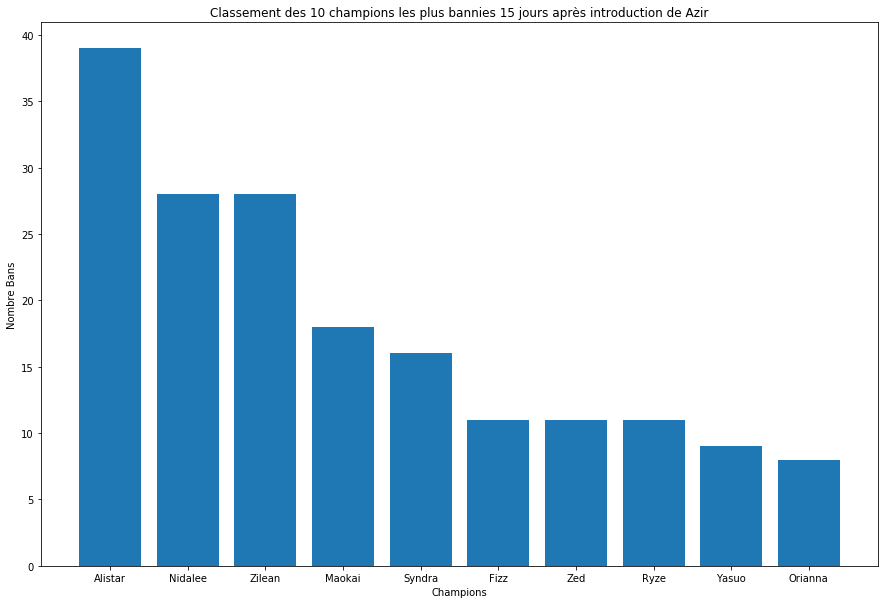

Le champions Azir est position [] sur 35 champions differents bannie


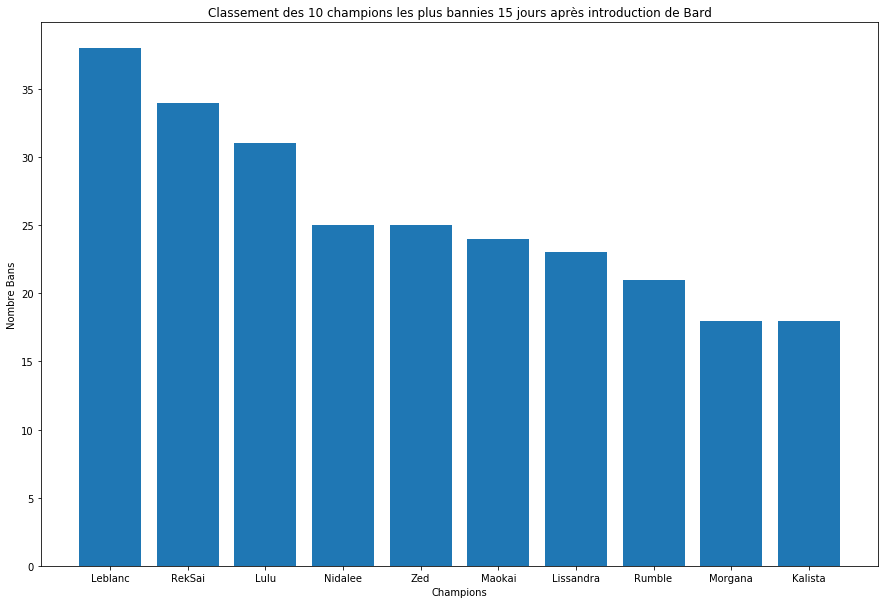

Le champions Bard est position [] sur 45 champions differents bannie


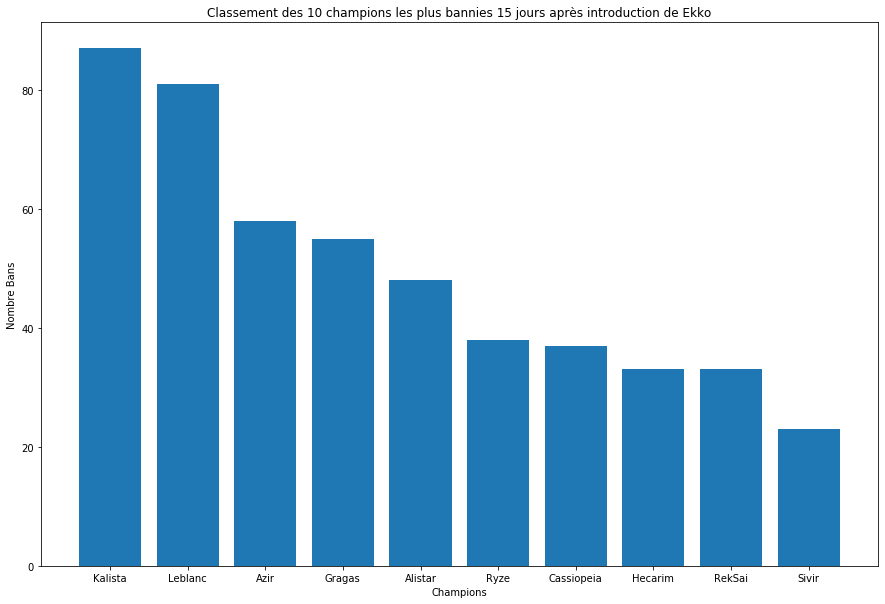

Le champions Ekko est position [35] sur 44 champions differents bannie


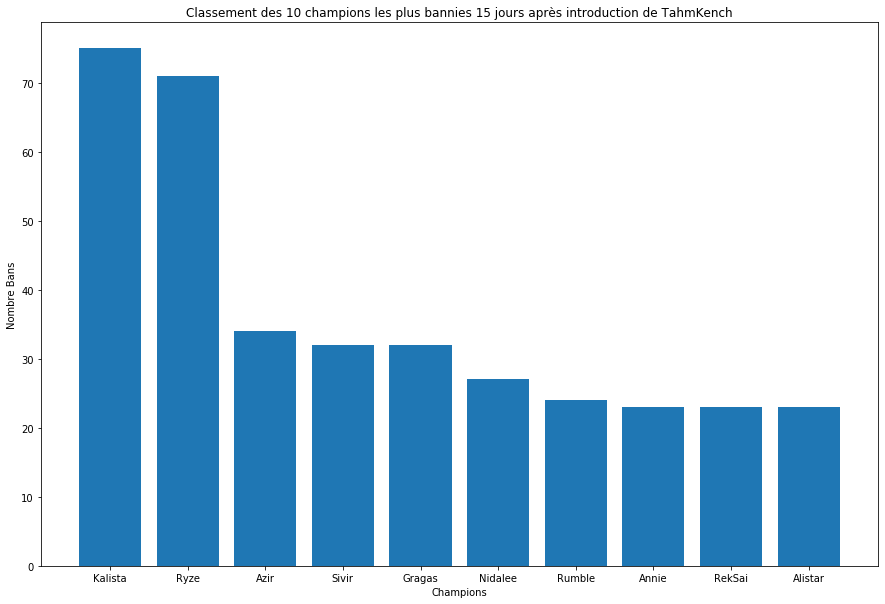

Le champions TahmKench est position [] sur 51 champions differents bannie


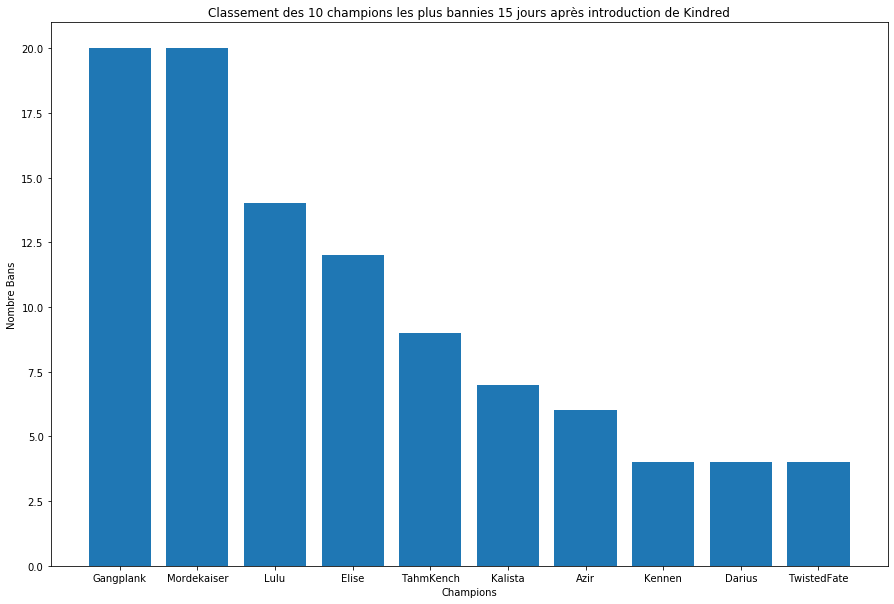

Le champions Kindred est position [] sur 20 champions differents bannie


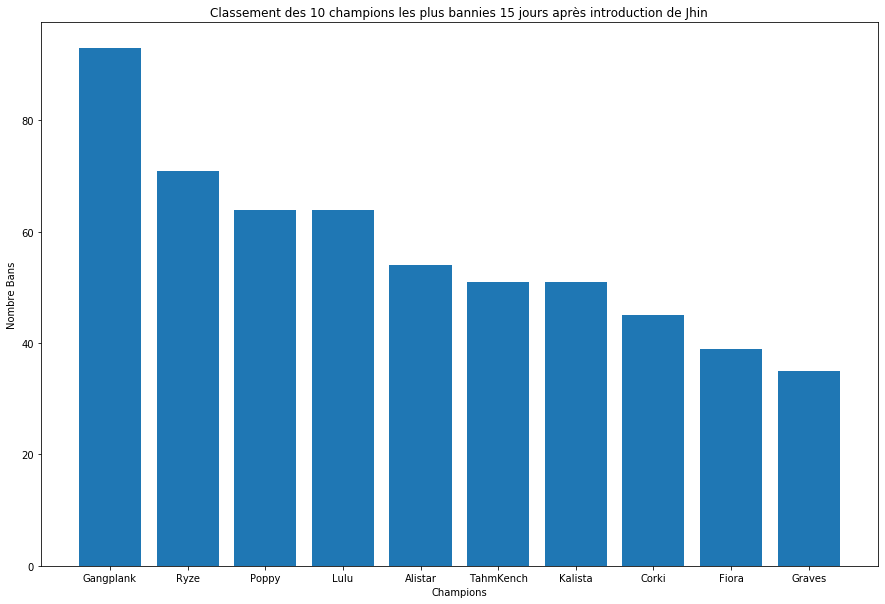

Le champions Jhin est position [] sur 57 champions differents bannie


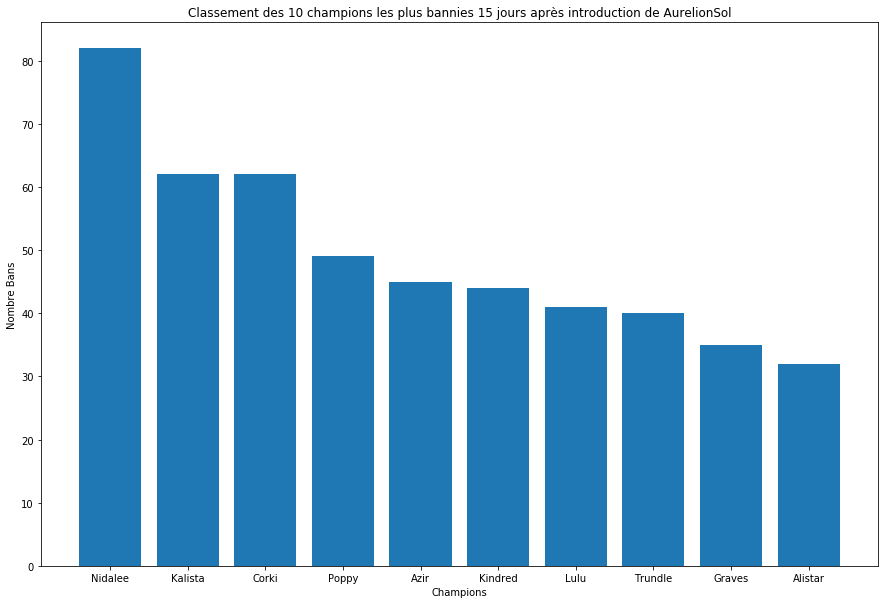

Le champions AurelionSol est position [] sur 58 champions differents bannie


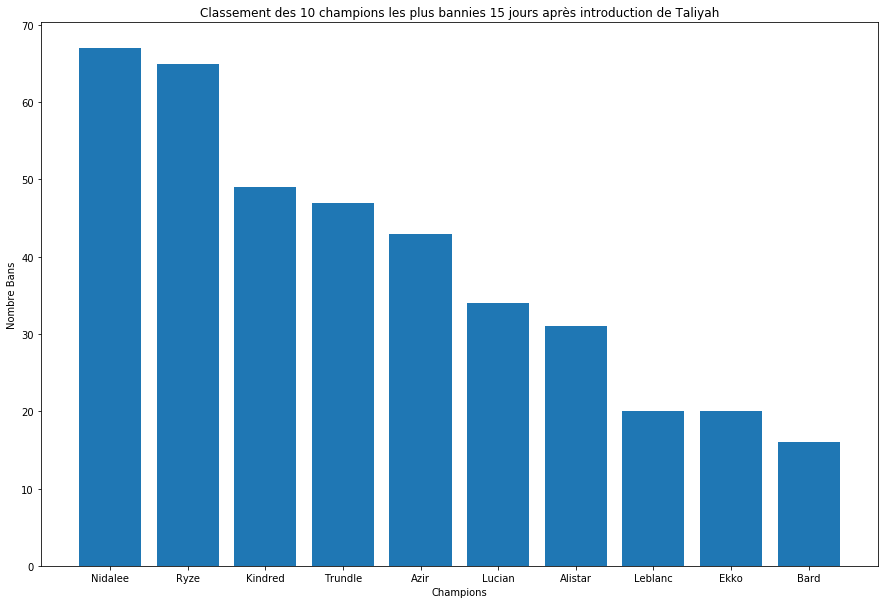

Le champions Taliyah est position [] sur 40 champions differents bannie


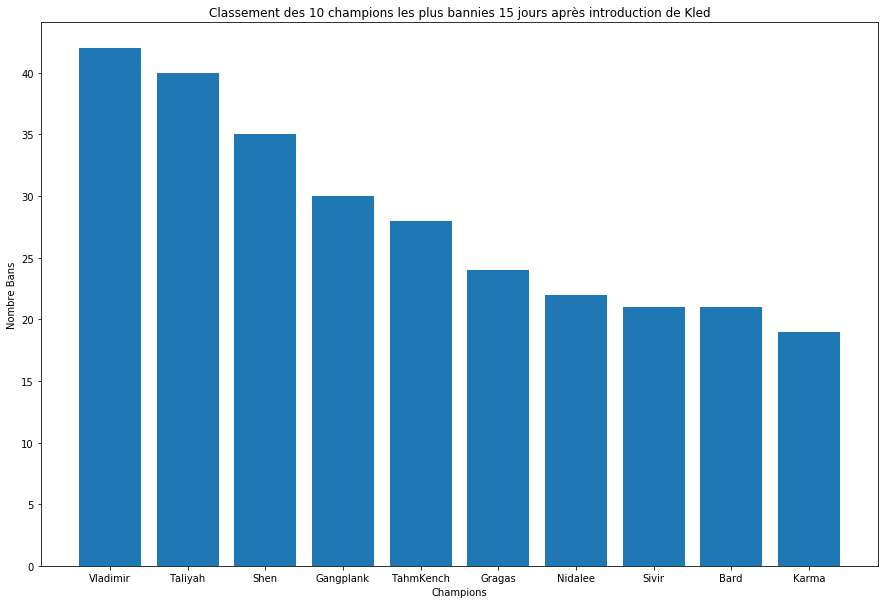

Le champions Kled est position [] sur 42 champions differents bannie


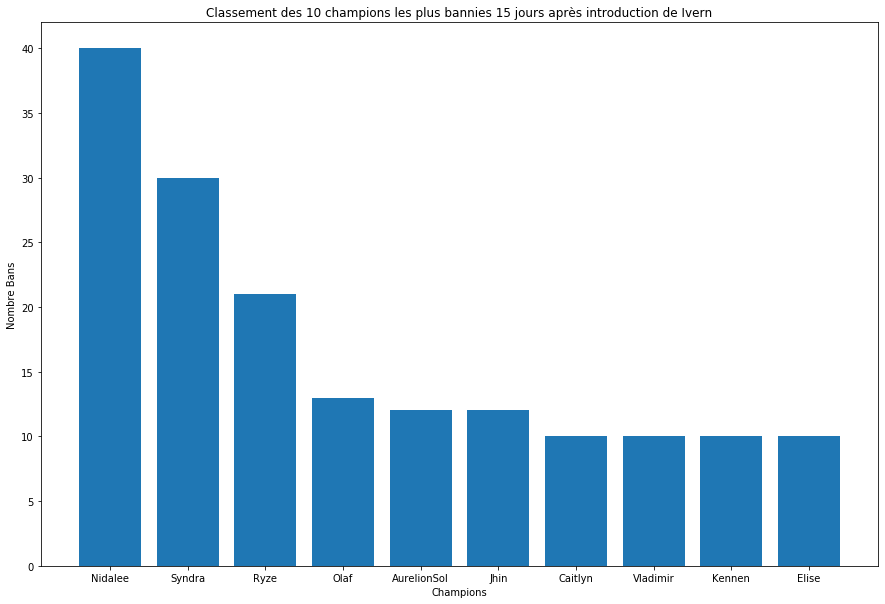

Le champions Ivern est position [] sur 40 champions differents bannie


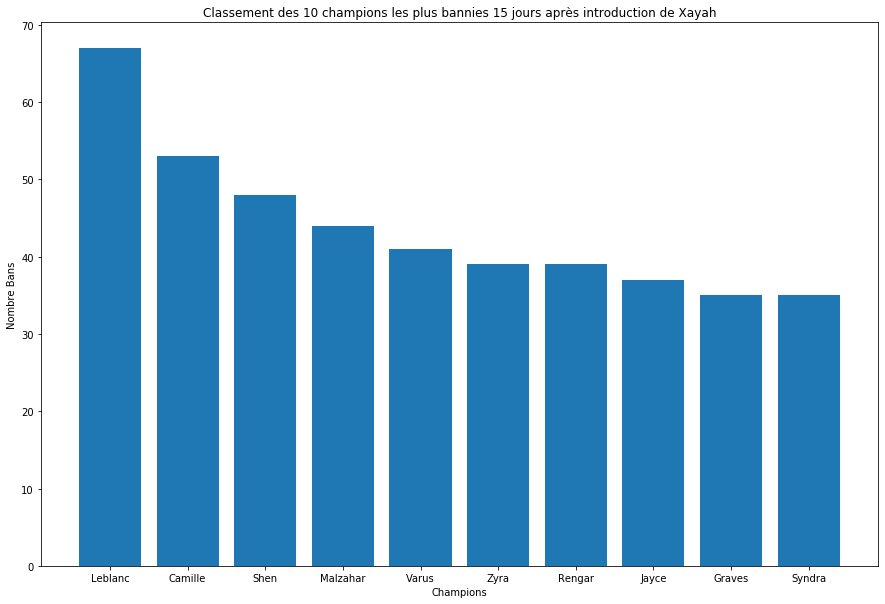

Le champions Xayah est position [] sur 67 champions differents bannie


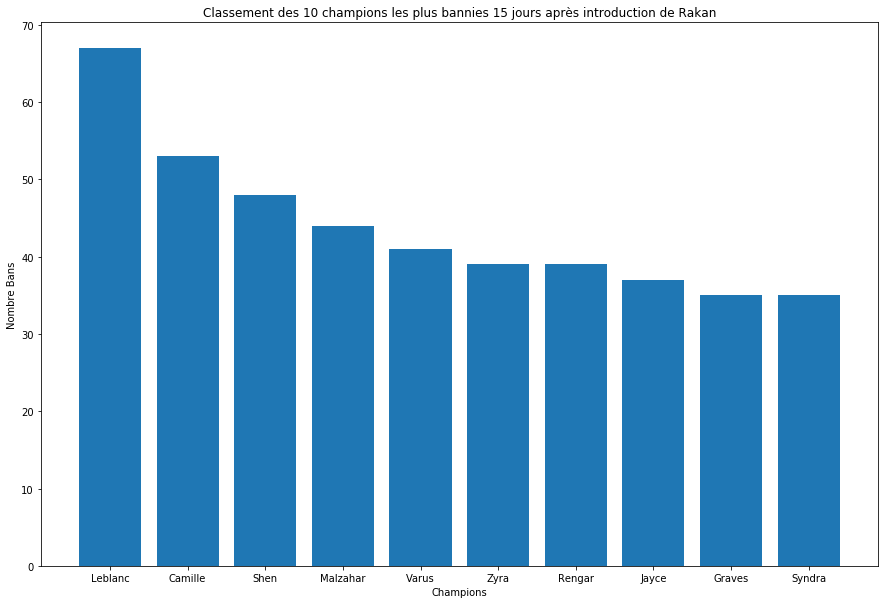

Le champions Rakan est position [] sur 67 champions differents bannie


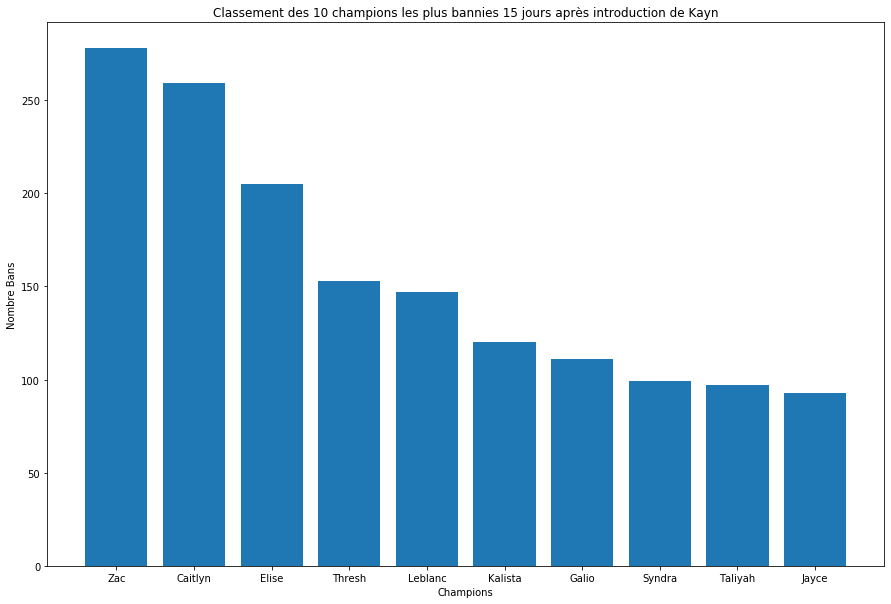

Le champions Kayn est position [74] sur 87 champions differents bannie


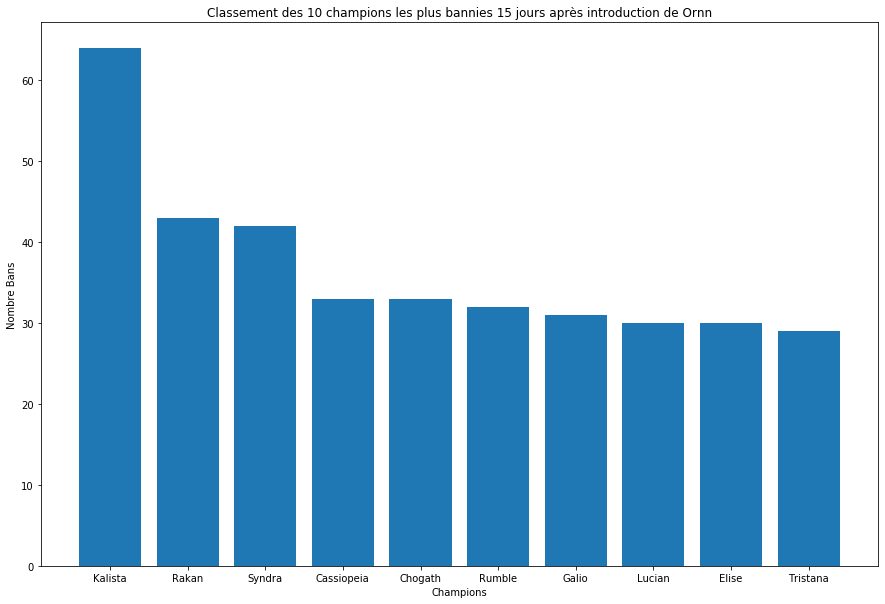

Le champions Ornn est position [] sur 78 champions differents bannie


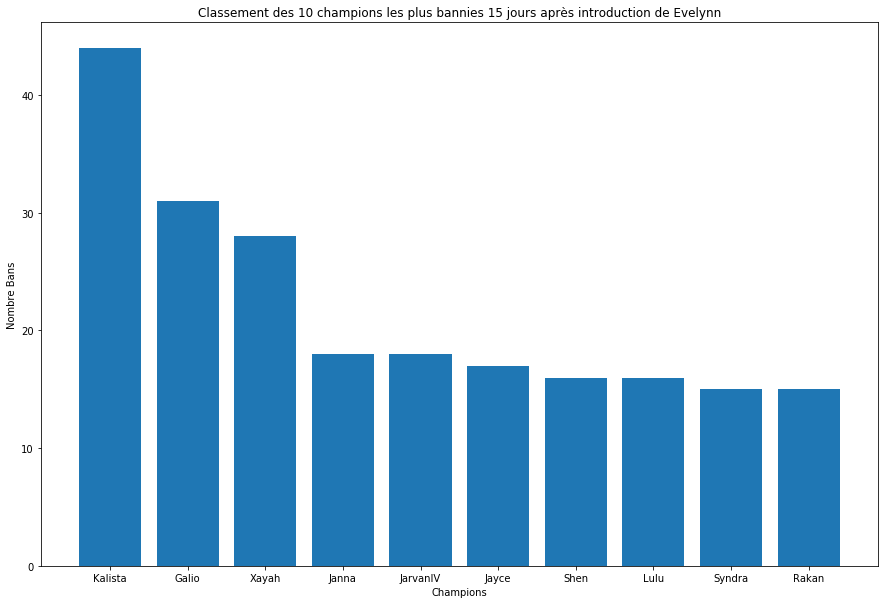

Le champions Evelynn est position [] sur 54 champions differents bannie


In [6]:
j = 0
for i in df_patchNotes.NvxPersonnage:
    if not isinstance(i, float):
        nbjour = 15
        date = df_patchNotes.iloc[j].Date
        ChampionsNouveau = df_patchNotes.iloc[j].NvxPersonnage[1:-1]
        dateplusjour = date + dt.timedelta(days=nbjour)
        datemoinsjour = date - dt.timedelta(days=nbjour)

        temp = df_bans[(df_bans.Date < dateplusjour) & (df_bans.Date >= date)]
        temp = pd.DataFrame(temp.Champions.value_counts())
        temp = temp.sort_values(by="Champions", ascending=False)
        temp = temp.reset_index()
        temp = temp.reset_index()
        temp.columns = ["Place","Champions","NombreBan"]
        temp.Place = temp.Place+1

        plt.figure(figsize=(15,10))
        plt.title("Classement des 10 champions les plus bannies {} jours après introduction de {}".format(nbjour,ChampionsNouveau))
        plt.ylabel('Nombre Bans')
        plt.xlabel('Champions')
        plt.bar(temp.Champions.head(10),temp.NombreBan.head(10))
        plt.show()
        print("Le champions {} est position {} sur {} champions differents bannie".format(ChampionsNouveau ,temp[temp.Champions == ChampionsNouveau].Place.values, len(temp)))
#         if (temp.Champions.any() == ChampionsNouveau):
#             print("Le champions {} est position {} sur {} champions differents bannie".format(ChampionsNouveau ,temp[temp.Champions == ChampionsNouveau].Place.values, len(temp)))
#         else:
#             print("Le champions {} n'est pas dans le classement des Champions bannie pendans cette periode".format(ChampionsNouveau))
        
    j+=1
        
        
        
        
        
        
        
        